## cross_val 시리즈 3형제

In [86]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [93]:
cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [88]:
cross_validate(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

{'fit_time': array([0.00300121, 0.00299835, 0.00200152, 0.00300074, 0.00299883,
        0.00299716, 0.00299883, 0.00200152, 0.004179  , 0.00200033]),
 'score_time': array([0.00399947, 0.00200009, 0.00199699, 0.00200081, 0.00200462,
        0.00200057, 0.00199962, 0.00300169, 0.00285029, 0.0029757 ]),
 'test_score': array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
        0.93333333, 0.93333333, 1.        , 1.        , 1.        ])}

In [87]:
cross_val_predict(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> - cross_val_score
    - scikit-learn에서 score는 accuracy를 의미한다.
    - 데이터가 적을 때 대강의 성능 측정하기 위해서 사용한다.
- cross_validate
    - "fit_time", "score_time", "test_score"를 반환한다.
        - test_score는 cross_val_score와 같다.
        -  `return_estimator=True` 옵션으로 모델을 반환시킬 수도 있다.
- cross_val_predict
    - 각 cv 폴드마다 testset으로 predict한 결과를 합쳐서 반환한다.
    - 즉, 자기를 제외하고 학습했던 cv 모델로 예측한 것들이다.
    - 이 결과를 바로 scorer에 넣으면 `cross_validate`나 `cross_val_score`와는 결과가 다를 수 있다.

In [1]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


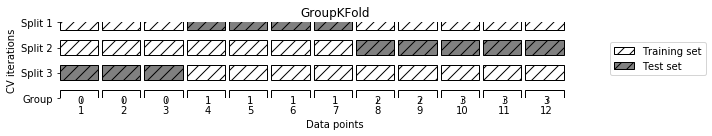

In [3]:
mglearn.plot_cross_validation.plot_group_kfold()

> - cross_val 시리즈에서 `groups`옵션의 의미는 위와 같다.

---

# 데이터 불러오기

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [8]:
data = load_iris()
iris_x = pd.DataFrame(data.data, columns=data.feature_names)
iris_y = pd.DataFrame(data.target, columns=["target"])
iris = pd.concat([iris_x, iris_y], axis=1)

In [11]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
knn = KNeighborsClassifier()

In [20]:
# 대강의 성능평가

cross_val_score(knn, iris.iloc[:,:-1], iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

# GridSearchCV
하이퍼 파라미터를 찾아주는 녀석  
무식하게 반복 노가다를 한다.(사람이 아니라 컴퓨터가!)

In [22]:
from sklearn.model_selection import GridSearchCV

In [21]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [24]:
grid = GridSearchCV(knn, {"n_neighbors":[i for i in range(2,19)]})

> - 모델의 파라미터 이름과 하이퍼파라미터 후보군을 딕셔너리 형태로 넣어준다.
- 하이퍼파라미터 후보군은 리스트로 묶어준다.

In [25]:
# scikit은 언제나 fit

grid.fit(iris.iloc[:,:-1], iris.target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
vars(grid)

{'scoring': None,
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'n_jobs': None,
 'iid': 'warn',
 'refit': True,
 'cv': 'warn',
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': 'raise-deprecating',
 'return_train_score': False,
 'param_grid': {'n_neighbors': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18]},
 'multimetric_': False,
 'best_index_': 3,
 'best_score_': 0.9866666666666667,
 'best_params_': {'n_neighbors': 5},
 'best_estimator_': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'refit_time_': 0.0010111331939697266,
 'scorer_': <function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 

> - grid 객체는 여러가지 정보를 담고 있다.

In [29]:
grid.best_index_

3

In [27]:
grid.best_params_

{'n_neighbors': 5}

In [28]:
grid.best_score_

0.9866666666666667

> - best로 시작하는 attributes는 GridSearchCV가 찾은 최고의 하이퍼 파라미터에 관련되어 있다.

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.00262411, 0.00200073, 0.00333198, 0.00234246, 0.0049994 ,
        0.00200184, 0.00166647, 0.0013326 , 0.00233332, 0.00166837,
        0.00200073, 0.00200137, 0.00200073, 0.0016671 , 0.00166893,
        0.00123803, 0.00233332]),
 'std_fit_time': array([5.11835043e-04, 8.16242927e-04, 4.71314409e-04, 4.65286670e-04,
        3.56265463e-03, 1.38109105e-06, 4.71483750e-04, 4.71483388e-04,
        4.71262827e-04, 4.72327939e-04, 8.16535434e-04, 6.83651389e-07,
        1.12391596e-07, 4.71595177e-04, 4.73568242e-04, 5.51354166e-04,
        4.71595177e-04]),
 'mean_score_time': array([0.00369875, 0.00399836, 0.00400138, 0.00532365, 0.00433771,
        0.00466442, 0.00466553, 0.00299978, 0.00366656, 0.00333285,
        0.00366545, 0.00366489, 0.00299923, 0.00266616, 0.00299684,
        0.00366672, 0.00300018]),
 'std_score_time': array([4.96338785e-04, 8.16632263e-04, 8.15854025e-04, 9.54542143e-04,
        1.25194050e-03, 9.39875574e-04, 2.35724530e-03, 1.27652315e-

> - `cv_results_`는 GridSearchCV가 노가다했던 모든 결과를 담고있다.

In [32]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
mean_fit_time,0.00262411,0.00200073,0.00333198,0.00234246,0.0049994,0.00200184,0.00166647,0.0013326,0.00233332,0.00166837,0.00200073,0.00200137,0.00200073,0.0016671,0.00166893,0.00123803,0.00233332
std_fit_time,0.000511835,0.000816243,0.000471314,0.000465287,0.00356265,1.38109e-06,0.000471484,0.000471483,0.000471263,0.000472328,0.000816535,6.83651e-07,1.12392e-07,0.000471595,0.000473568,0.000551354,0.000471595
mean_score_time,0.00369875,0.00399836,0.00400138,0.00532365,0.00433771,0.00466442,0.00466553,0.00299978,0.00366656,0.00333285,0.00366545,0.00366489,0.00299923,0.00266616,0.00299684,0.00366672,0.00300018
std_score_time,0.000496339,0.000816632,0.000815854,0.000954542,0.00125194,0.000939876,0.00235725,1.27652e-06,0.000941954,0.00124872,0.000474406,0.000942798,2.9736e-07,0.000471314,2.97997e-06,0.000944539,0.000817898
param_n_neighbors,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
params,{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14},{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18}
split0_test_score,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784
split1_test_score,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392,0.980392,0.960784,0.960784,0.941176,0.960784,0.941176,0.941176,0.941176,0.901961
split2_test_score,0.958333,1,0.979167,1,0.979167,0.979167,0.979167,0.979167,0.979167,1,0.979167,0.979167,0.979167,1,0.979167,0.979167,0.979167
mean_test_score,0.953333,0.98,0.973333,0.986667,0.973333,0.973333,0.98,0.973333,0.973333,0.973333,0.966667,0.96,0.966667,0.966667,0.96,0.96,0.946667


> - pandas DataFrame형태로 바꾸면 깔끔한 보고서 형식으로 볼 수 있다.

# RandomSearchCV
하이퍼 파라미터를 찾는 또 다른 방법

In [33]:
from sklearn.model_selection import RandomizedSearchCV

> - GridSearchCV는 오래 걸린다...  = 비용이 많이 든다.
- random하게 찾는 기법이다.
    - 좀 더 빨리 찾을 확률이 있다.

In [106]:
rd = RandomizedSearchCV(knn, {"n_neighbors":[i for i in range(2,10)], "leaf_size":range(10,50,10)})

> 사용법은 GridSearchCV와 같다.

In [107]:
rd.fit(iris.iloc[:,:-1], iris.target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': range(10, 50, 10),
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [108]:
vars(rd)

{'param_distributions': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
  'leaf_size': range(10, 50, 10)},
 'n_iter': 10,
 'random_state': None,
 'scoring': None,
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'n_jobs': None,
 'iid': 'warn',
 'refit': True,
 'cv': 'warn',
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': 'raise-deprecating',
 'return_train_score': False,
 'multimetric_': False,
 'best_index_': 3,
 'best_score_': 0.9866666666666667,
 'best_params_': {'n_neighbors': 5, 'leaf_size': 20},
 'best_estimator_': KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'refit_time_': 0.001998424530029297,
 'scorer_': <function sklearn.metrics.scorer._passthrough_scorer(estimator, *args, 

In [109]:
rd.best_index_, rd.best_score_, rd.best_params_

(3, 0.9866666666666667, {'n_neighbors': 5, 'leaf_size': 20})

In [110]:
pd.DataFrame(rd.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00284251,0.00334517,0.00199874,0.00231632,0.0029846,0.00299962,0.002985,0.00299899,0.00362126,0.00266774
std_fit_time,0.000225293,0.000923152,3.97205e-06,0.000450592,0.000818149,0.00081634,1.99542e-05,1.57348e-06,0.000531335,0.000471089
mean_score_time,0.00433183,0.00498398,0.00434717,0.00334859,0.00466673,0.00534924,0.00466514,0.00433437,0.00504367,0.00466577
std_score_time,0.000472053,0.00144206,0.000487677,0.000462323,0.000943147,0.000490537,0.000470536,0.000470588,0.000872863,0.000471316
param_n_neighbors,4,2,3,5,8,4,6,7,4,2
param_leaf_size,30,40,40,20,10,20,30,10,10,10
params,"{'n_neighbors': 4, 'leaf_size': 30}","{'n_neighbors': 2, 'leaf_size': 40}","{'n_neighbors': 3, 'leaf_size': 40}","{'n_neighbors': 5, 'leaf_size': 20}","{'n_neighbors': 8, 'leaf_size': 10}","{'n_neighbors': 4, 'leaf_size': 20}","{'n_neighbors': 6, 'leaf_size': 30}","{'n_neighbors': 7, 'leaf_size': 10}","{'n_neighbors': 4, 'leaf_size': 10}","{'n_neighbors': 2, 'leaf_size': 10}"
split0_test_score,0.980392,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784
split1_test_score,0.960784,0.941176,0.960784,0.980392,0.980392,0.960784,0.960784,0.960784,0.960784,0.941176
split2_test_score,0.979167,0.958333,1,1,0.979167,0.979167,0.979167,0.979167,0.979167,0.958333


> - 주어진 parameter를 랜덤한 조합으로 시도한 것을 알 수 있다.

# Pipeline

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
from sklearn.preprocessing import StandardScaler

In [67]:
pipe = Pipeline([('ss',StandardScaler()), ('knn',KNeighborsClassifier())])

> - pipeline은 전처리를 한번에 처리해준다.
- list 안에 tuple을 넣어서 인자로 넘겨준다.
- 마지막에는 estimator를 넣어줘야한다. (= model)

In [68]:
# scikit은 언제나 fit!

pipe.fit(iris.iloc[:,:-1], iris.target)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [69]:
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False,
 'ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

# GridSearchCV + Pipeline
- GridSearchCV에 Pipeline을 넣음으로써 전처리와 하이퍼파라미터 찾기를 한번에 할 수 있다.

In [43]:
grid2 = GridSearchCV(pipe, {"n_neighbors":[i for i in range(2,19)]}, cv=10)

> - `GridSearchCV`의 estimator에 `pipeline`을 넣을 수 있다.

In [44]:
# Error
grid2.fit(iris.iloc[:,:-1], iris.target)

ValueError: Invalid parameter n_neighbors for estimator Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

> - 에러가 나는 이유는 이름 때문이다.
    - `Pipleline`의 docstring을 보면 \"\_\_\"를 구분자로 넣으라는 말이 있다.
        - The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a \'\_\_\'

In [45]:
grid3 = GridSearchCV(pipe, {"knn__n_neighbors":[i for i in range(2,19)]}, cv=10)

> - 모델 이름은 Pipeline 만들 때 썼던 모델 이름을 써야한다.
- `__`를 이용해서 모델 이름과 파라미터 이름을 구분한다.

In [46]:
# scikit은 언제나 fit!

grid3.fit(iris.iloc[:,:-1], iris.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False)

> - 전처리 단계만 지정해주면 알아서 전처리가 적용되고, 전처리된 데이터에 대해서 하이퍼 파라미터도 찾아준다.

# 모델과 하이퍼파라미터를 동시에 찾는 꼼수!
### GridSearchCV + Pipeline + Dummy
- 원래 GridSearchCV는 하이퍼 파라미터를 찾는 용도이기 때문에 적합한 모델을 찾는 용도로 쓸 수 없다.
- 꼼수를 통해서 GridSearchCV가 grid를 그려서 하이퍼파라미터 찾듯이 모델도 grid를 그려서 찾게할 수 있다.

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
dummy = DummyClassifier()

> - dummy는 바보 estimator이다.
- dummy는 사람처럼 대충 class가 나올 확률을 기반으로 때려맞춘다.
    - 이 동네에서 dummy(바보)란 사람을 뜻함...

In [71]:
pipe2 = Pipeline([("clf", DummyClassifier())])

> - DummyClassifier로 Pipeline을 만든다.
- clf는 classifier의 약자이다.

In [72]:
pipe2.get_params()

{'memory': None,
 'steps': [('clf',
   DummyClassifier(constant=None, random_state=None, strategy='stratified'))],
 'verbose': False,
 'clf': DummyClassifier(constant=None, random_state=None, strategy='stratified'),
 'clf__constant': None,
 'clf__random_state': None,
 'clf__strategy': 'stratified'}

> - pipeline의 parmas를 보면 clf라는 이름의 파라미터에 Dummyclassifier가 있다.
- 이걸 이용해서 꼼수를 부릴 수 있다.
- `clf`라는 파라미터를 grid search 시키는 것이다.

In [73]:
grid4 = GridSearchCV(pipe2, [
    {"clf":[DummyClassifier()], "clf__strategy":["stratified", "most_frequent"]},
    {"clf":[KNeighborsClassifier()], "clf__n_neighbors":[i for i in range(2,10)]}
])

> - clf가 파라미터인양 넣고 value에 해당하는 list에는 알고리즘을 넣었다.
- `param_grid`옵션을 list로 했을 때는 list 안의 dictionary만 개별적으로 탐색한다.
    - 파라미터 grid는 같은 dictionary 안에서만 그려진다.
- GridSearchCV가 처음에 돌때는 DummyClassifer를 clf로 하고 clf_strategy를 바꿔가며 grid search한다.
- 그 다음 clf를 KNeighborsClassifier로 하고 clf__n_neighbors를 바꿔가며 grid search한다.

In [74]:
grid4.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__memory': None,
 'estimator__steps': [('clf',
   DummyClassifier(constant=None, random_state=None, strategy='stratified'))],
 'estimator__verbose': False,
 'estimator__clf': DummyClassifier(constant=None, random_state=None, strategy='stratified'),
 'estimator__clf__constant': None,
 'estimator__clf__random_state': None,
 'estimator__clf__strategy': 'stratified',
 'estimator': Pipeline(memory=None,
          steps=[('clf',
                  DummyClassifier(constant=None, random_state=None,
                                  strategy='stratified'))],
          verbose=False),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': [{'clf': [DummyClassifier(constant=None, random_state=None, strategy='stratified')],
   'clf__strategy': ['stratified', 'most_frequent']},
  {'clf': [KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
       

> - 파라미터가 어떻게 저장되었나 보자.
- 큰 의미는 없다.

In [61]:
grid4.fit(iris.iloc[:,:-1], iris.target)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DummyClassifier(constant=None,
                                                        random_state=None,
                                                        strategy='stratified'))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'clf': [DummyClassifier(constant=None,
                                                  random_state=None,
                                                  strategy='most_frequent')],
                          'clf__strategy': ['stratified', 'most_frequent']},
                         {'clf': [KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkowski',
                               

In [62]:
pd.DataFrame(grid4.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00233444,0.00200025,0.00200176,0.00266719,0.00200057,0.00266687,0.00333381,0.00266584,0.00200065,0.00133292
std_fit_time,0.000472495,2.643e-06,2.57521e-06,0.000471881,7.78672e-07,0.000471314,0.000465142,0.00047126,7.86741e-07,0.000471764
mean_score_time,0.000667651,0.000332832,0.00366505,0.00256817,0.00400035,0.00500584,0.00432928,0.00333412,0.00366767,0.00266631
std_score_time,0.000472101,0.000470696,0.00169784,0.00041922,0.00141299,0.0014121,0.000944483,0.000470473,0.000473286,0.000471595
param_clf,"DummyClassifier(constant=None, random_state=No...","DummyClassifier(constant=None, random_state=No...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_clf__strategy,stratified,most_frequent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_clf__n_neighbors,NaN,NaN,2,3,4,5,6,7,8,9
params,"{'clf': DummyClassifier(constant=None, random_...","{'clf': DummyClassifier(constant=None, random_...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',..."
split0_test_score,0.294118,0.333333,0.960784,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.960784
split1_test_score,0.333333,0.333333,0.941176,0.960784,0.960784,0.980392,0.960784,0.960784,0.980392,0.980392


> - `cv_results_`의 param_clf를 보면 알고리즘을 바꿔가면서 search한 것을 알 수 있다.

---

# TPOT
- genetic algorithm(유전자 알고리즘)
- population 기반으로 하이퍼파라미터 찾아준다
- 단점: 극악의 속도...

In [76]:
!pip install tpot

  Created wheel for tpot: filename=TPOT-0.11.0-cp37-none-any.whl size=75689 sha256=61019fe356788762696c42ddfdd7b4b656aa7f3764f21acd307e9820c38b28e4
  Stored in directory: C:\Users\JINHYO\AppData\Local\pip\Cache\wheels\5e\79\3b\49ccea9a29f28d0cdecbca22d71515c23bf45e1e65bc925cb8
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11961 sha256=9164e4496c897cea7f1b9f74a32067f43a995a76452ccdbcd8b1cdce9fd649c9
  Stored in directory: C:\Users\JINHYO\AppData\Local\pip\Cache\wheels\3c\85\2b\2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot stopit


In [77]:
from tpot import TPOTClassifier

In [79]:
tp = TPOTClassifier()

In [80]:
tp.get_params()

{'config_dict': None,
 'crossover_rate': 0.1,
 'cv': 5,
 'disable_update_check': False,
 'early_stop': None,
 'generations': 100,
 'max_eval_time_mins': 5,
 'max_time_mins': None,
 'memory': None,
 'mutation_rate': 0.9,
 'n_jobs': 1,
 'offspring_size': None,
 'periodic_checkpoint_folder': None,
 'population_size': 100,
 'random_state': None,
 'scoring': None,
 'subsample': 1.0,
 'template': None,
 'use_dask': False,
 'verbosity': 0,
 'warm_start': False}

In [81]:
tp.fit(iris.iloc[:,:-1], iris.target)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=100,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=0, warm_start=False)

In [ ]:
# 다음에 자세히 알아보자.

# Autokeras
- https://autokeras.com/
- 호환 라이브러리들을 버전이 낮은거를 쓴다.

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak

In [ ]:
# 있다는 것만 알고 설치는 생략함.